In [1]:
import pandas as pd

In [2]:
jeopardy = pd.read_csv("jeopardy.csv")

In [3]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [42]:
jeopardy.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer', 'answer_in_question', 'question_overlap'],
      dtype='object')

In [4]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Show Number  19999 non-null  int64 
 1    Air Date    19999 non-null  object
 2    Round       19999 non-null  object
 3    Category    19999 non-null  object
 4    Value       19999 non-null  object
 5    Question    19999 non-null  object
 6    Answer      19999 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [5]:
jeopardy.columns = jeopardy.columns.str.strip()

In [6]:
jeopardy["Air Date"] = pd.to_datetime(jeopardy["Air Date"])

In [7]:
jeopardy["Question"].head(10)

0    For the last 8 years of his life, Galileo was ...
1    No. 2: 1912 Olympian; football star at Carlisl...
2    The city of Yuma in this state has a record av...
3    In 1963, live on "The Art Linkletter Show", th...
4    Signer of the Dec. of Indep., framer of the Co...
5    In the title of an Aesop fable, this insect sh...
6    Built in 312 B.C. to link Rome & the South of ...
7    No. 8: 30 steals for the Birmingham Barons; 2,...
8    In the winter of 1971-72, a record 1,122 inche...
9    This housewares store was named for the packag...
Name: Question, dtype: object

In [8]:
jeopardy["Question"].str.lower().str.replace(r"[^A-Za-z0-9\s]", "")

0        for the last 8 years of his life galileo was u...
1        no 2 1912 olympian football star at carlisle i...
2        the city of yuma in this state has a record av...
3        in 1963 live on the art linkletter show this c...
4        signer of the dec of indep framer of the const...
                               ...                        
19994    of 8 12 or 18 the number of us states that tou...
19995                             the new power generation
19996    in 1589 he was appointed professor of mathemat...
19997    before the grand jury she said im really sorry...
19998    llamas are the heftiest south american members...
Name: Question, Length: 19999, dtype: object

In [9]:
jeopardy["Question"].str.lower().str.replace(r"[\W]", " ").str.replace("\s+", " ") 

0        for the last 8 years of his life galileo was u...
1        no 2 1912 olympian football star at carlisle i...
2        the city of yuma in this state has a record av...
3        in 1963 live on the art linkletter show this c...
4        signer of the dec of indep framer of the const...
                               ...                        
19994    of 8 12 or 18 the number of u s states that to...
19995                             the new power generation
19996    in 1589 he was appointed professor of mathemat...
19997    before the grand jury she said i m really sorr...
19998    llamas are the heftiest south american members...
Name: Question, Length: 19999, dtype: object

In [10]:
# bol = jeopardy["Question"].str.contains(r"^F")

# jeopardy["Question"][bol]

In [11]:
jeopardy["Question"] = jeopardy["Question"].str.lower().str.replace(r"[^A-Za-z0-9\s]", "")

In [12]:
jeopardy["Answer"] = jeopardy["Answer"].str.lower().str.replace(r"[\W]", " ").str.replace("\s+", " ")

In [13]:
jeopardy

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,in 1963 live on the art linkletter show this c...,mcdonald s
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,signer of the dec of indep framer of the const...,john adams
...,...,...,...,...,...,...,...
19994,3582,2000-03-14,Jeopardy!,U.S. GEOGRAPHY,$200,of 8 12 or 18 the number of us states that tou...,18
19995,3582,2000-03-14,Jeopardy!,POP MUSIC PAIRINGS,$200,the new power generation,prince
19996,3582,2000-03-14,Jeopardy!,HISTORIC PEOPLE,$200,in 1589 he was appointed professor of mathemat...,galileo
19997,3582,2000-03-14,Jeopardy!,1998 QUOTATIONS,$200,before the grand jury she said im really sorry...,monica lewinsky


In [14]:
jeopardy["Value"].value_counts()

$400      3892
$800      2980
$200      2784
$600      1890
$1000     1796
          ... 
$4,100       1
$367         1
$2,900       1
$5,800       1
$2,127       1
Name: Value, Length: 76, dtype: int64

In [15]:
def normalize(value):
    import re
    value = re.sub(r"[^A-Za-z0-9\s]", "",value )  
    try:                                          
        value = int(value)                        
    except Exception:                             
        value = 0
    return value


In [16]:
jeopardy["Value"] = jeopardy["Value"].apply(normalize)

In [17]:
jeopardy["Value"].dtype

dtype('int64')

In [18]:
jeopardy["Value"].ndim  

1

In [19]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,in 1963 live on the art linkletter show this c...,mcdonald s
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,signer of the dec of indep framer of the const...,john adams


In [20]:
jeopardy["Answer"].str.split()

0              [copernicus]
1             [jim, thorpe]
2                 [arizona]
3             [mcdonald, s]
4             [john, adams]
                ...        
19994                  [18]
19995              [prince]
19996             [galileo]
19997    [monica, lewinsky]
19998              [camels]
Name: Answer, Length: 19999, dtype: object

In [21]:
def matches(row):
    split_ans = row["Answer"].split()    
    split_quest = row["Question"].split()
    
    if "the" in split_ans:
        split_ans.remove("the")          
    
    if len(split_ans) == 0:
        return 0
    
    else:
        count = 0
        for i in split_ans:
            if i in split_quest:
                count += 1
        return count/len(split_ans)


In [23]:
jeopardy["answer_in_question"] = jeopardy.apply(matches, axis = 1)

In [24]:
jeopardy["answer_in_question"].mean()

0.05864810598172278

In [25]:
# jeopardy["question_overlap"] 

In [26]:
jeopardy.sort_values("Air Date", inplace = True)

In [27]:
lst = []

terms_used = set()  

for i , row in jeopardy.iterrows():
    split_ques = row["Question"].split()
    split_ques = [j for j in split_ques if len(j) > 5]
    
    count = 0
    for j in split_ques:
        if j not in terms_used:
            terms_used.add(j)
        else:
            count +=1
    if len(split_ques) > 0:
        count /= len(split_ques)
    lst.append(count)                  

In [28]:
def overlap(series):
    split_ques = series.split()
    split_ques = [j for j in split_ques if len(j) > 5]
    
    count = 0
    for j in split_ques:
        if j not in terms_used:
            terms_used.add(j)
        else:
            count +=1
    if len(split_ques) > 0:
        count /= len(split_ques)
    return count

In [29]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,answer_in_question
19325,10,1984-09-21,Final Jeopardy!,U.S. PRESIDENTS,0,adventurous 26th president he was 1st to ride ...,theodore roosevelt,0.0
19301,10,1984-09-21,Double Jeopardy!,LABOR UNIONS,200,notorious labor leader missing since 75,jimmy hoffa,0.0
19302,10,1984-09-21,Double Jeopardy!,1789,200,washington proclaimed nov 26 1789 this first n...,thanksgiving,0.0
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,200,both ferde grofe the colorado river dug this ...,the grand canyon,0.0
19304,10,1984-09-21,Double Jeopardy!,LITERATURE,200,depending on the book he could be a jones a sa...,tom,0.0


In [30]:
jeopardy["question_overlap"]  = lst

In [31]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,answer_in_question,question_overlap
19325,10,1984-09-21,Final Jeopardy!,U.S. PRESIDENTS,0,adventurous 26th president he was 1st to ride ...,theodore roosevelt,0.0,0.0
19301,10,1984-09-21,Double Jeopardy!,LABOR UNIONS,200,notorious labor leader missing since 75,jimmy hoffa,0.0,0.0
19302,10,1984-09-21,Double Jeopardy!,1789,200,washington proclaimed nov 26 1789 this first n...,thanksgiving,0.0,0.0
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,200,both ferde grofe the colorado river dug this ...,the grand canyon,0.0,0.5
19304,10,1984-09-21,Double Jeopardy!,LITERATURE,200,depending on the book he could be a jones a sa...,tom,0.0,0.0


In [32]:
jeopardy["question_overlap"].mean()

0.6894031359073217

In [33]:
print(terms_used)

{'trimline', 'kittery', 'prettier', '13letter', 'orbison', 'pankhurst', 'material', 'excuse', 'dominant', 'adamant', 'tracks', 'schulz', 'rectangular', 'stores', 'opposite', '20foot', 'lankas', 'moveable', 'evidenced', 'renames', 'molecule', 'aeropagus', 'hrefhttpwwwjarchivecommedia20080723j13bjpg', 'consumers', 'sanitary', 'haitian', 'charge', 'flopped', 'lyrical', 'balinese', 'doubletalk', 'pansies', 'unworthy', 'carstrangled', 'orioles', 'directive', 'bacteriologist', 'hammer', 'baumer', 'woodpecker', 'studied', 'cherokee', 'smoking', 'watching', 'dragged', 'tacking', 'clerks', 'partners', 'selects', 'thailand', 'hotels', 'quarto', 'fanciers', 'gentlys', 'melvins', 'stances', 'breath', 'margarita', 'eloquently', 'alcoholics', 'depart', 'circulated', 'fission', 'agricultural', 'verbomania', 'shelley', 'fitzgerald', 'pastorship', 'alternating', 'grambling', '30yearold', 'widespread', '43year', 'incorrect', 'flowery', 'hilarys', 'citadel', 'quinnat', 'travel', 'habsburg', 'subscapulari

In [ ]:
# Question topic repeatition based on the whole question (or question repeatition).
# How much % of the question have been repeated.

In [34]:
jeopardy[jeopardy["question_overlap"] >0]

,Show Number,Air Date,Round,Category,Value,Question,Answer,answer_in_question,question_overlap
19303,10,1984-09-21,Double Jeopardy!,TOURIST TRAPS,200,both ferde grofe the colorado river dug this ...,the grand canyon,0.0,0.500000
19275,10,1984-09-21,Jeopardy!,DOUBLE TALK,100,not a hawaiian cow but a dress worn by hawaiia...,a muumuu,0.5,0.500000
19277,10,1984-09-21,Jeopardy!,SHIPS,100,unsinkable for most of its maiden voyage in 1912,the titanic,0.0,0.333333
8570,62,1984-12-04,Jeopardy!,FOOD,500,the nonchocolate version are called blondies,brownies,0.0,0.250000
8567,62,1984-12-04,Jeopardy!,WASHINGTON D.C.,500,former secretary of state for whom washington ...,john foster dulles,0.0,0.200000
...,...,...,...,...,...,...,...,...,...
1953,6294,2012-01-19,Double Jeopardy!,WEAPONS OF WORLD WAR II,800,ships in the us navys casablanca class of esco...,aircraft carriers,0.0,1.000000
1954,6294,2012-01-19,Double Jeopardy!,ACTING PRESIDENTS ON TV,800,dennis haysbert db woodside as david wayne p...,24,0.0,0.600000
1955,6294,2012-01-19,Double Jeopardy!,4 N,800,u know it means not deliberate im sorry that s...,unintentional,0.0,1.000000
1945,6294,2012-01-19,Double Jeopardy!,AMERICAN HISTORY,400,in december 1974 this former new york governor...,rockefeller,0.0,1.000000


In [35]:
jeopardy["Value"].describe()

count    19999.000000
mean       748.336267
std        653.988299
min          0.000000
25%        400.000000
50%        600.000000
75%       1000.000000
max      12000.000000
Name: Value, dtype: float64

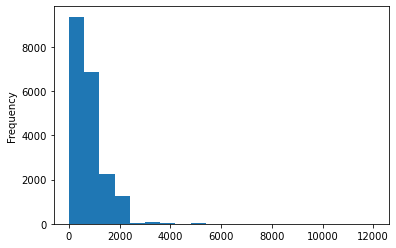

In [36]:
jeopardy["Value"].plot.hist(bins = 20)

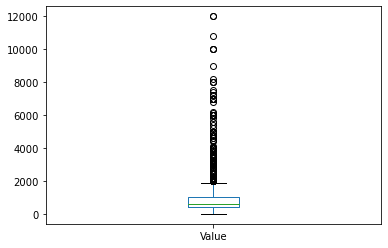

In [37]:
jeopardy["Value"].plot.box()

In [38]:
jeopardy["Value"].describe()

count    19999.000000
mean       748.336267
std        653.988299
min          0.000000
25%        400.000000
50%        600.000000
75%       1000.000000
max      12000.000000
Name: Value, dtype: float64

In [39]:
"kicked" in terms_used



True

In [40]:
term = "kicked"


def high_low(term):
    for i, row in jeopardy.iterrows():
        low_count = 0
        high_count = 0
        if term in row["Question"].split():
            if row["high_value"] == "High Value":
                high_count += 1
            else:
                low_count += 1
        return low_count, high_count    

In [41]:
for i, row in jeopardy.iterrows():
        low_count = 0
        high_count = 0
        if term in row["Question"].split():
            if row["high_value"] == "High Value": # 1
                high_count += 1
            else:
                low_count += 1
      

KeyError: 'high_value'